# Respuesta en frecuencia y temporal de un sistema mecanico

Librerias necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.ticker as tck
import scipy.signal as signal

In [2]:
def plot_resp_freq(freq, H_w, tipo='lineal'):

    if tipo == 'lineal':
        #Calculos de fase y magnitud
        mag_Hw = np.abs(H_w)
        fase_Hw = np.angle(H_w)

        # Figura con dos subplots
        fig, ax = plt.subplots(1,2)
        fig.suptitle('Respuesta en Frecuencia', fontsize=22)
        fig.set_size_inches(20, 10)
        ax[0].plot(freq,mag_Hw)
        ax[1].plot(freq,fase_Hw)
        # add lables
        ax[0].set_xlabel("Frecuencia  \u03C9", fontsize=16)
        ax[0].set_ylabel("Magnitud |H(j*\u03C9)|", fontsize=16)
        ax[1].set_ylabel("Fase \u2220H(j*\u03C9)", fontsize=16)
        ax[1].set_xlabel("Frecuencia \u03C9", fontsize=16)
        ax[0].grid(True)
        ax[1].grid(True)
        plt.show()

    elif tipo == 'bode':
        #Transformacion a decibeles
        mag_Hw_dB = 20*np.log10(np.abs(H_w))
        fase_Hw = np.angle(H_w)*180/np.pi

        #Conservo solo lo que corresponde a frecuencias positivas
        indx = np.where(freq >= 0.01)
        mag_Hw_dB = mag_Hw_dB[indx]
        fase_Hw = fase_Hw[indx]
        freq = freq[indx]

        # Figura con dos subplots
        fig, ax = plt.subplots(1,2)
        fig.suptitle('Respuesta en Frecuencia', fontsize=22)
        fig.set_size_inches(20, 10)
        ax[0].plot(freq,mag_Hw_dB)
        ax[0].semilogx()
        ax[1].plot(freq,fase_Hw)
        ax[1].semilogx()
        # add lables
        ax[0].set_xlabel("Frecuencia  \u03C9", fontsize=16)
        ax[0].set_ylabel("Magnitud 20*log10|H(j*\u03C9)| [dB]", fontsize=16)
        ax[1].set_ylabel("Fase \u2220H(j*\u03C9)", fontsize=16)
        ax[1].set_xlabel("Frecuencia \u03C9", fontsize=16)
        ax[0].grid(True)
        ax[1].grid(True)
        plt.show()

## Sistema mecanico: resorte-masa-amortiguador

![Sistema](./external_files/Esquema_Sist_Mecanico.jpg)

Si utilizamos la estrategia de equilibrar fuerzas:  $\sum{}{} F = M*x''$

Considernado una fuerza externa $f_{s}$ y descontando la fuerza necesaria para deformar el resosrte y la absorbida por el amortiguador, el balance se fuerza se puede expresar como:

$f_{s}(t) - c*x'(t) - k*x(t) = M*x''(t)$

Considerando condiciones iniciales nulas (C.I. = 0), con el efecto de la masa estabilizado, aplicamos la Transformada de Laplace a ambos lados (recuerde que C.I. = 0):

$F_{s}(s) - c*s*X(s) - k*X(s) = M*s^{2}*X(s)$

Finalmente, buscamos la funciona de transferencia que relacione la fuerza (entrada) con la salida (posicion):

$H(s) = \frac{X(s)}{F(s)} = \frac{1}{M*s^{2} + c*s + k}$

In [64]:
# Constantes del sistema
k = 2 #[N/m]
M = 20 #[kg]
c = 4 # [N*s/m]

In [65]:
# Para el analisis en frecuencia
fmin = -100
fmax = 100
paso = 0.001
f = np.arange(fmin,fmax+1,paso)
w = f*2*np.pi

#sistema
H_w = 1/(M*(1j*w)**2 + c*(1j*w) + k) # 

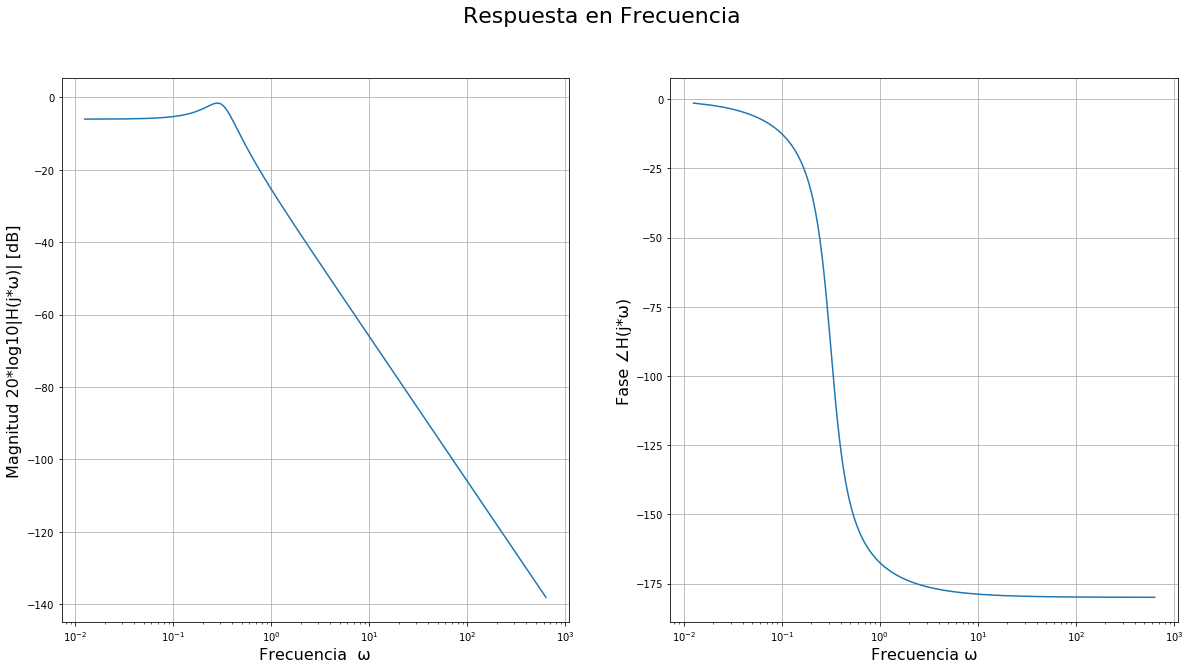

In [66]:
# Obtengo el diagrama de Bode utilizando la funcion "hecha a mano"
plot_resp_freq(w, H_w, 'bode')

### Utilizando la libreria scipy.signal

In [53]:
# Definicion del sistema
sys = signal.lti([0.0, 0.0, 1.0],[M, c, k]) # 

#respuesta en frecuencia
w, H = signal.freqresp(sys,w)
mag = abs(H)#magnitud
fase = np.angle(H)/np.pi#fase[rad]

c:\Users\Agustin\Anaconda3\lib\site-packages\scipy\signal\filter_design.py:1626: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


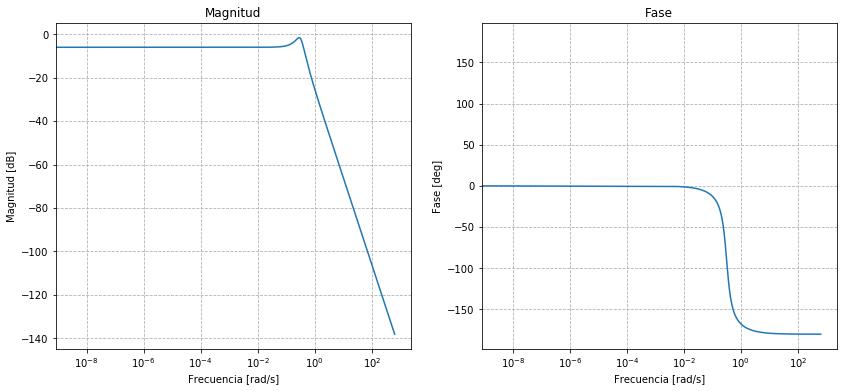

In [54]:
# Grafica de Bode
wb, magb, faseb = signal.bode(sys,w)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.semilogx(wb, magb)
#ax1.plot(w0,-3,'x')
ax1.set_title("Magnitud")  
ax1.set_xlabel("Frecuencia [rad/s]")  
ax1.set_ylabel("Magnitud [dB]")
ax1.grid(linestyle='--', which="both")#grilla punteada para escala logaritmica
ax2.semilogx(w, faseb)  
#ax2.plot(w0,-45,'x')
ax2.set_title("Fase")
ax2.set_xlabel("Frecuencia [rad/s]")  
ax2.set_ylabel("Fase [deg]") 
ax2.grid(linestyle='--', which="both")

c:\Users\Agustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


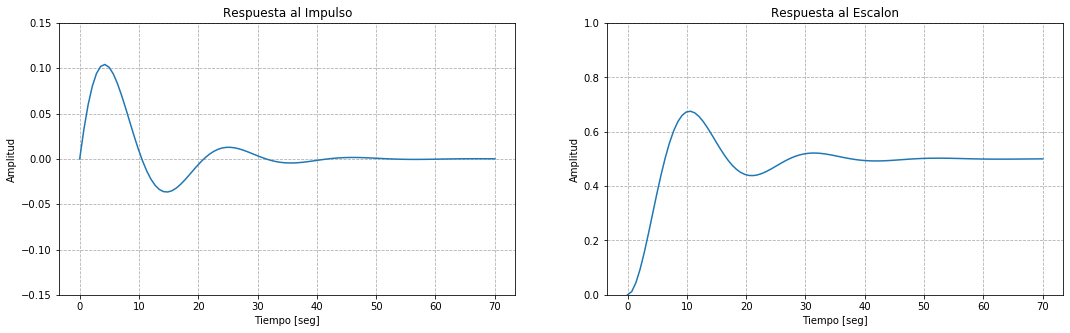

In [58]:
#Respuesta temporales al impulso y al escalon
t_impulse, y_impulse = signal.impulse(sys)
t_step, y_step = signal.step(sys)

fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(18, 5))

# Respuesta el impulso
ax3.plot(t_impulse, y_impulse)
ax3.set_ylim(-0.15,0.15)
ax3.grid(linestyle='--')#grilla punteada
ax3.set_title("Respuesta al Impulso")
ax3.set_xlabel("Tiempo [seg]")
ax3.set_ylabel("Amplitud")
ax4.plot(t_step,y_step)
ax4.set_title("Respuesta al Escalon")
ax4.set_xlabel("Tiempo [seg]")
ax4.set_ylabel("Amplitud")
ax4.set_ylim(0.0,1.0)
ax4.grid(linestyle='--')
fig2.show()

Preguntas:

Si analiza el sistema mecanico como filtro, de que tipo se trata? De que orden es?

Que interpreta a partir de la respuesta en frecuencia?

Como cambia el comportamiento del sistema al modificar drasticamente las constantes de los componentes?
